# Building A Handwritten Digits Classifier

Deep neural networks have been used to reach state-of-the-art performance on image classification tasks in the last decade.

For some image classification tasks, deep neural networks actually perform as well as or slightly better than the human benchmark.

Deep learning is effective in image classification because of the models' ability to learn hierarchical representations. 

At a high level, an effective deep learning model learns intermediate representations at each layer in the model and uses them in the prediction process.



In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

In [3]:
ld = load_digits()

In [4]:
ld.keys()

dict_keys(['data', 'images', 'DESCR', 'target', 'target_names'])

In [5]:
labels = pd.Series(ld["target"])

In [6]:
data = pd.DataFrame(ld["data"])
data.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [7]:
labels.head()

0    0
1    1
2    2
3    3
4    4
dtype: int64

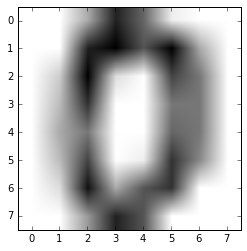

In [23]:
%matplotlib inline
first_image = data.iloc[0]
np_image = first_image.values
np_image = np_image.reshape(8,8)

plt.imshow(np_image, cmap = "gray_r")

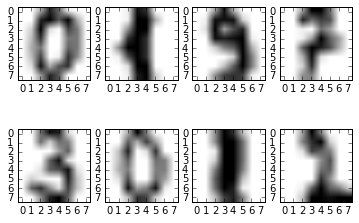

In [24]:
%matplotlib inline
f, ax = plt.subplots(2, 4)

ax[0,0].imshow(data.iloc[0].values.reshape(8, 8), cmap = "gray_r")
ax[0,1].imshow(data.iloc[99].values.reshape(8, 8), cmap = "gray_r")
ax[0,2].imshow(data.iloc[199].values.reshape(8, 8), cmap = "gray_r")
ax[0,3].imshow(data.iloc[299].values.reshape(8, 8), cmap = "gray_r")

ax[1,0].imshow(data.iloc[999].values.reshape(8, 8), cmap = "gray_r")
ax[1,1].imshow(data.iloc[1099].values.reshape(8, 8), cmap = "gray_r")
ax[1,2].imshow(data.iloc[1199].values.reshape(8, 8), cmap = "gray_r")
ax[1,3].imshow(data.iloc[1299].values.reshape(8, 8), cmap = "gray_r")

#  K-Nearest Neighbors 

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

def train(nneighbors, train_features, train_labels):
    knn = KNeighborsClassifier(n_neighbors = nneighbors)
    knn.fit(train_features, train_labels)
    return knn

def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df["correct_label"] = test_labels
    train_test_df["predicted_label"] = predictions
    overall_accuracy = sum(train_test_df["predicted_label"] == train_test_df["correct_label"])/len(train_test_df)
    return overall_accuracy

def cross_validate(k):
    fold_accuracies = []
    kf = KFold(n_splits = 4, random_state = 2)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train(k, train_features, train_labels)
        fold_accuracies.append(test(model, test_features, test_labels))
    return fold_accuracies

knn_one_accuracies = cross_validate(1)
np.mean(knn_one_accuracies)

0.9677233358079684

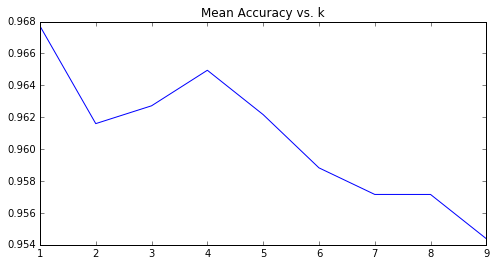

In [26]:
%matplotlib inline
k_values = list(range(1,10))
k_overall_accuracies = []

for k in k_values:
    k_accuracies = cross_validate(k)
    k_mean_accuracy = np.mean(k_accuracies)
    k_overall_accuracies.append(k_mean_accuracy)
    
plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. k")
plt.plot(k_values, k_overall_accuracies)
plt.show()

# Neural Networks

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier

def train_nn(n_arch, train_features, train_labels):
    mlp = MLPClassifier(hidden_layer_sizes = n_arch)
    mlp.fit(train_features, train_labels)
    return mlp
def test_nn(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test = pd.DataFrame()
    train_test["correct_values"] = test_labels
    train_test["predicted_values"] = predictions
    overall_accuracy = sum(train_test["predicted_values"] == train_test["correct_values"]) / len(train_test)
    return overall_accuracy

def cross_validate_nn(n_arch):
    fold_accuracies = []
    kf = KFold(n_splits = 4, random_state = 2)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train_nn(n_arch, train_features, train_labels)
        fold_accuracies.append(test_nn(model, test_features, test_labels))
    return fold_accuracies


/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



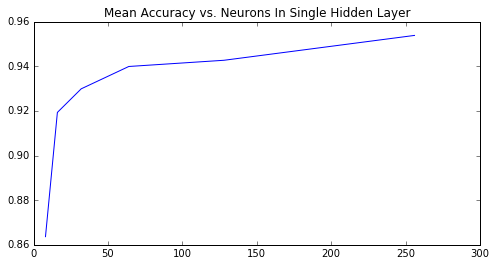

In [36]:
%matplotlib inline
nn_one_neurons = [
    (8,),
    (16,),
    (32,),
    (64,),
    (128,),
    (256,)
]
nn_one_accuracies = []

for n in nn_one_neurons:
    nn_accuracies = cross_validate_nn(n)
    nn_mean_accuracy = np.mean(nn_accuracies)
    nn_one_accuracies.append(nn_mean_accuracy)
    
plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Single Hidden Layer")

x = [i[0] for i in nn_one_neurons]
plt.plot(x, nn_one_accuracies)
plt.show()

## Summary:

It looks like adding more neurons to the single hidden layer helped massively improved simple accuracy from approximately 86% to approximately 94%. Simple accuracy computes the number of correct classifications the model made, but doesn't tell us anything about false or true positives or false or true negatives.

Given that k-nearest neighbors achieved approximately 96% accuracy, there doesn't seem to be any advantages to using a single hidden layer neural network for this problem.

# Neural Network With Two Hidden Layers

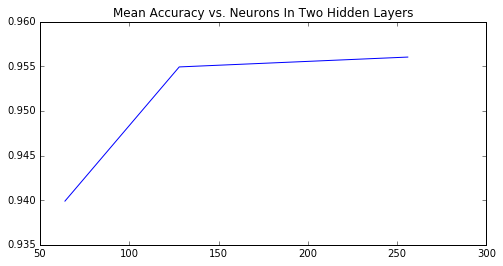

In [39]:
%matplotlib inline
nn_two_neurons = [(64, 64), (128, 128), (256, 256)]
nn_two_accuracies = []

for n in nn_two_neurons:
    nn_accuracies = cross_validate_nn(n)
    nn_mean_accuracy = np.mean(nn_accuracies)
    nn_two_accuracies.append(nn_mean_accuracy)
    
plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Two Hidden Layers")

x = [i[0] for i in nn_two_neurons]
plt.plot(x, nn_two_accuracies)
plt.show()

## Summary

Using 2 hidden layers improved our simple accuracy to 95%. While I'd traditionally be worried about overfitting, using 4-fold cross validation also gives me a bit more assurance that the model is generalizing to achieve the extra 1% in simple accuracy over the single hidden layer networks we tried earlier.

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



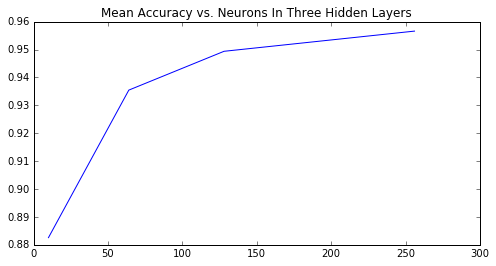

In [40]:
%matplotlib inline
nn_three_neurons = [(10, 10, 10), (64, 64, 64), (128, 128, 128), (256, 256, 256)]
nn_three_accuracies = []

for n in nn_three_neurons:
    nn_accuracies = cross_validate_nn(n)
    nn_mean_accuracy = np.mean(nn_accuracies)
    nn_three_accuracies.append(nn_mean_accuracy)
    
plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Three Hidden Layers")

x = [i[0] for i in nn_three_neurons]
plt.plot(x, nn_three_accuracies)
plt.show()

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier

def train_nn(n_arch, train_features, train_labels):
    mlp = MLPClassifier(hidden_layer_sizes = n_arch)
    mlp.fit(train_features, train_labels)
    return mlp
def test_nn(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test = pd.DataFrame()
    train_test["correct_values"] = test_labels
    train_test["predicted_values"] = predictions
    overall_accuracy = sum(train_test["predicted_values"] == train_test["correct_values"]) / len(train_test)
    return overall_accuracy

def cross_validate_nn(n_arch):
    fold_accuracies = []
    kf = KFold(n_splits = 6, random_state = 2)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train_nn(n_arch, train_features, train_labels)
        fold_accuracies.append(test_nn(model, test_features, test_labels))
    return fold_accuracies

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



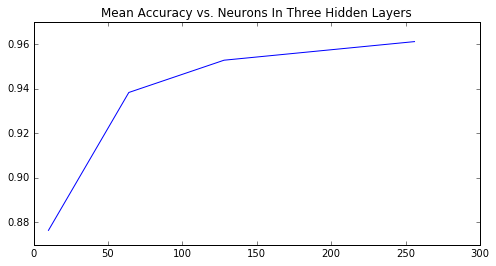

In [42]:
%matplotlib inline
nn_three_neurons = [(10, 10, 10), (64, 64, 64), (128, 128, 128), (256, 256, 256)]
nn_three_accuracies = []

for n in nn_three_neurons:
    nn_accuracies = cross_validate_nn(n)
    nn_mean_accuracy = np.mean(nn_accuracies)
    nn_three_accuracies.append(nn_mean_accuracy)
    
plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Three Hidden Layers")

x = [i[0] for i in nn_three_neurons]
plt.plot(x, nn_three_accuracies)
plt.show()

## Summary

Using 3 hidden layers improved our simple accuracy to 96%, even with 6-fold cross validation. This seems to be in line with the research literature out there about deep neural networks for computer vision. Having more layers and more neurons tends to improve the network's performance.